In [1]:
# set up some environmental dependencies
import time, sys, os
import h5py
import numpy as np
from astropy.table import Table
import scipy
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
from astropy.coordinates import SkyCoord
from astropy.cosmology import WMAP9 as cosmo
from astropy.table import Table
import astropy.cosmology.units as cu
import astropy.units as u
from matplotlib.pyplot import *
import seaborn as sns
import numpy as np, matplotlib.pyplot as plt
from astropy.convolution import convolve, Box1DKernel
from astropy.io import ascii
from matplotlib.font_manager import FontProperties
from matplotlib import gridspec
import matplotlib
from astropy.table import Table
import warnings
warnings.filterwarnings("ignore")

# standard imports for my work
from bpt_utils import *
from read_transients_data import *
from correct_redshift_evolution import *
from generate_bkg_galaxies import *
from helper_functions import *
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
    }
)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['image.origin'] = 'lower'
sns.set_context('talk') 
sns.set(font_scale=1.8)
sns.set_palette('colorblind')
sns.set_style('ticks')
# plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.family"] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma', 'Verdana', 'Lucida Grande', 'DejaVu Sans']

cmap = matplotlib.cm.get_cmap('magma_r')
colors = ["white", "white", "white"]+[cmap(i/100) for i in range(100)]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
cmap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", ["lime","navajowhite", "dodgerblue"])



In [2]:
cosmos_data = read_cosmos_3dhst_data()
dsa_frbs = read_dsa_data()
askap_frbs = read_askap_nr_frbs()
askap_frbs_rep = read_askap_r_frbs()
chime_frbs = read_chime_data()


### Mass-Metallicity Relation

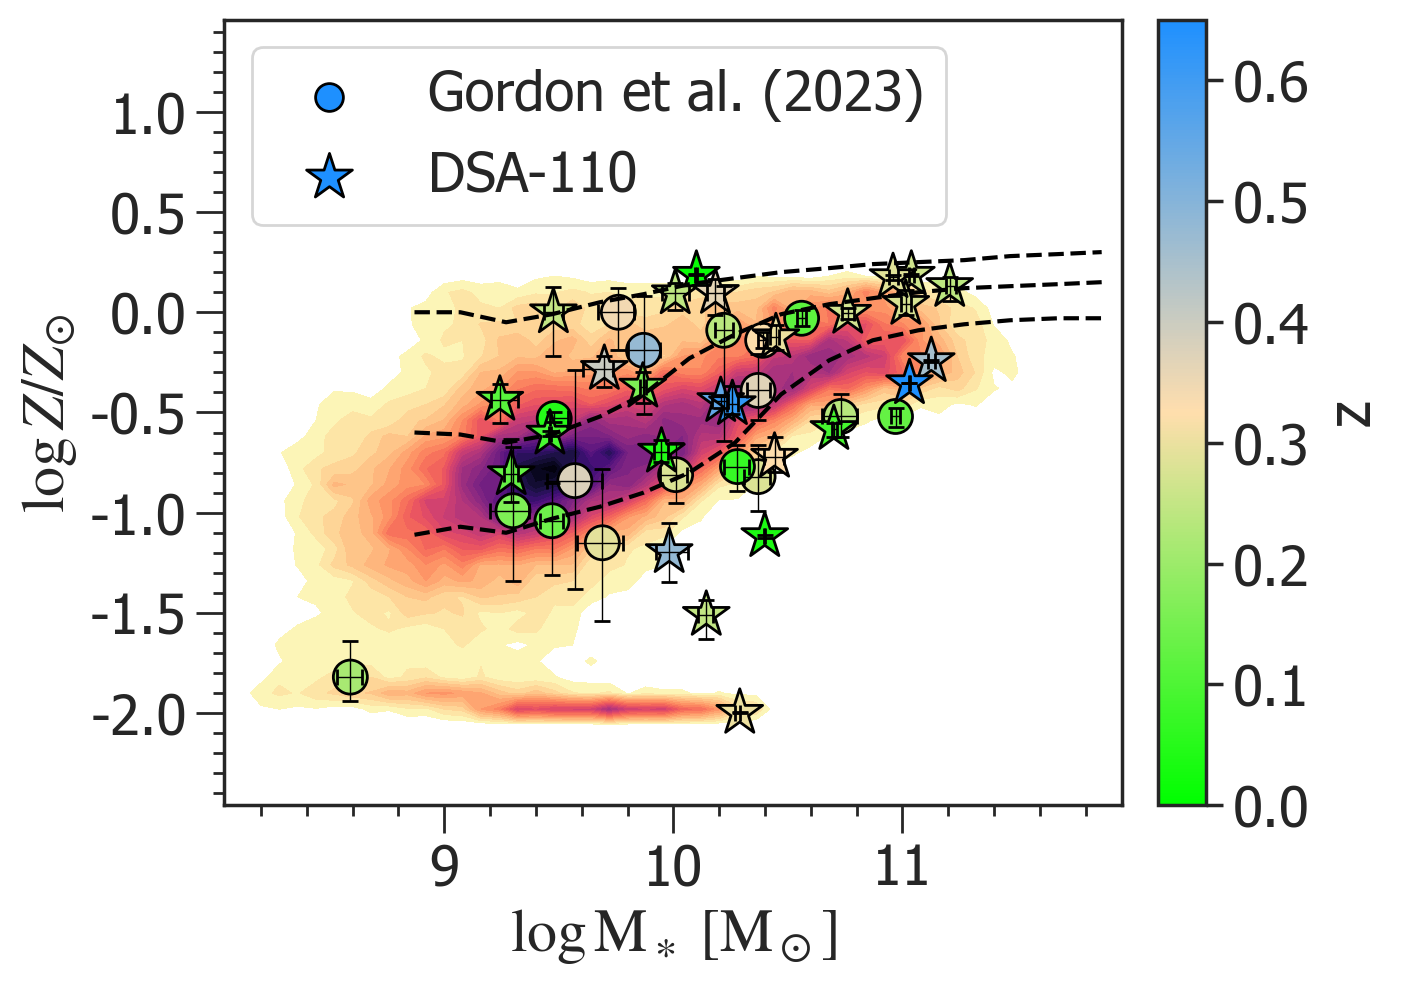

In [3]:
fig = plt.figure(figsize=(8, 7))
grid = plt.GridSpec(4, 4, hspace=0.45, wspace=0.6)

ax = fig.add_subplot(grid[:-1, 1:])

ax.tick_params(axis='x')
ax.tick_params(axis='y')

xbins = 50
ybins = 50
counts, xedges, yedges = np.histogram2d(list(cosmos_data["Mass"]), 
                                        list(cosmos_data["massmet_2_median"]), 
                                        bins=(xbins, ybins),
                                        range=[[8, 12], [-2.5, 1.5]])
xs = []
ys = []
for i in range(len(xedges)-1):
    xs.append((xedges[i]+xedges[i+1])/2)
    ys.append((yedges[i]+yedges[i+1])/2)

mplt = ax.contourf(xs, ys, counts.transpose(), 30, cmap=cmap)

massmet = np.loadtxt('galaxies_data/gallazzi_05_massmet.txt')
ax.plot(massmet[:, 0], massmet[:, 2], color="black", ls="--")
ax.plot(massmet[:, 0], massmet[:, 1], color="black", ls="--")
ax.plot(massmet[:, 0], massmet[:, 3], color="black", ls="--")

im2 = ax.errorbar(askap_frbs["logMstar"],
                   askap_frbs["logzsol"], 
                   xerr = [np.abs(askap_frbs["logMstar_errl"]), askap_frbs["logMstar_erru"]],
                   yerr = [np.abs(askap_frbs["logzsol_errl"]), askap_frbs["logzsol_erru"]],
                   ecolor="black", fmt="*", capsize=3, elinewidth=0.5,
                   markerfacecolor="none", markeredgecolor="none")
im2 = ax.scatter(askap_frbs["logMstar"], 
                 askap_frbs["logzsol"], 
                 c=askap_frbs["z"], 
                 cmap=cmap2, marker="o", s=150, edgecolors='black')
im2.set_clim(0, 0.65)

im2 = ax.errorbar(dsa_frbs["logMstar"],
                   dsa_frbs["logzsol"], 
                   xerr = [np.abs(dsa_frbs["logMstar_errl"]), dsa_frbs["logMstar_erru"]],
                   yerr = [np.abs(dsa_frbs["logzsol_errl"]), dsa_frbs["logzsol_erru"]],
                   ecolor="black", fmt="*", capsize=3, elinewidth=0.5,
                   markerfacecolor="none", markeredgecolor="none")
im2 = ax.scatter(dsa_frbs["logMstar"], 
                 dsa_frbs["logzsol"], 
                 c=dsa_frbs["redshift"], 
                 cmap=cmap2, marker="*", s=300, edgecolors='black')
im2.set_clim(0, 0.65)

# create color bar
box = ax.get_position()
ax.set_position([box.x0*1.0, box.y0, box.width, box.height])
axColor = plt.axes([box.x0*1.0005 + box.width * 1.04, box.y0, 0.03, box.height])
cb = plt.colorbar(im2, cax = axColor, orientation="vertical")
cb.set_label('z', labelpad = 5)

im2 = ax.scatter(dsa_frbs[dsa_frbs["sample"]=="Silver"]["logMstar"], 
                 dsa_frbs[dsa_frbs["sample"]=="Silver"]["logzsol"],
                 color="None", marker="o", s=400, edgecolors='cyan', lw=1.5)


ax.set_yticks(np.arange(-2.5, 1.5, 0.5))                                                                                                                                                                                                                              
ax.set_xticks(np.arange(8.5, 12, 0.5))                                                                                                                                                                                                                                  
ax.xaxis.set_major_locator(MultipleLocator(1)) 
ax.xaxis.set_minor_locator(MultipleLocator(0.2))                                                                                                                                                                                                                         
ax.yaxis.set_major_locator(MultipleLocator(0.5))                                                                                                                                                                                                                     
ax.yaxis.set_minor_locator(MultipleLocator(0.1)) 
ax.tick_params(direction='out', length=6, width=1, top=False, right=False)
ax.tick_params(which='both', width=1)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', length=4)

ax.set_xlabel(r"$\log{{\mathrm{M}}_\ast}~[{\mathrm{M}}_\odot]$")
ax.set_ylabel(r"$\log{Z/Z_{\odot}}$")

ax.scatter([], [], color="dodgerblue", marker="o", s=100, edgecolors='black', label="Gordon et al. (2023)")
ax.scatter([], [], color="dodgerblue", marker="*", s=300, edgecolors='black', label="DSA-110")
ax.legend(loc="upper left")

# plt.savefig('figures/gal_massmet.png', dpi=400, bbox_inches='tight')


### Galaxy Star Forming Main Sequence

Text(0.02, 1.04, 'c')

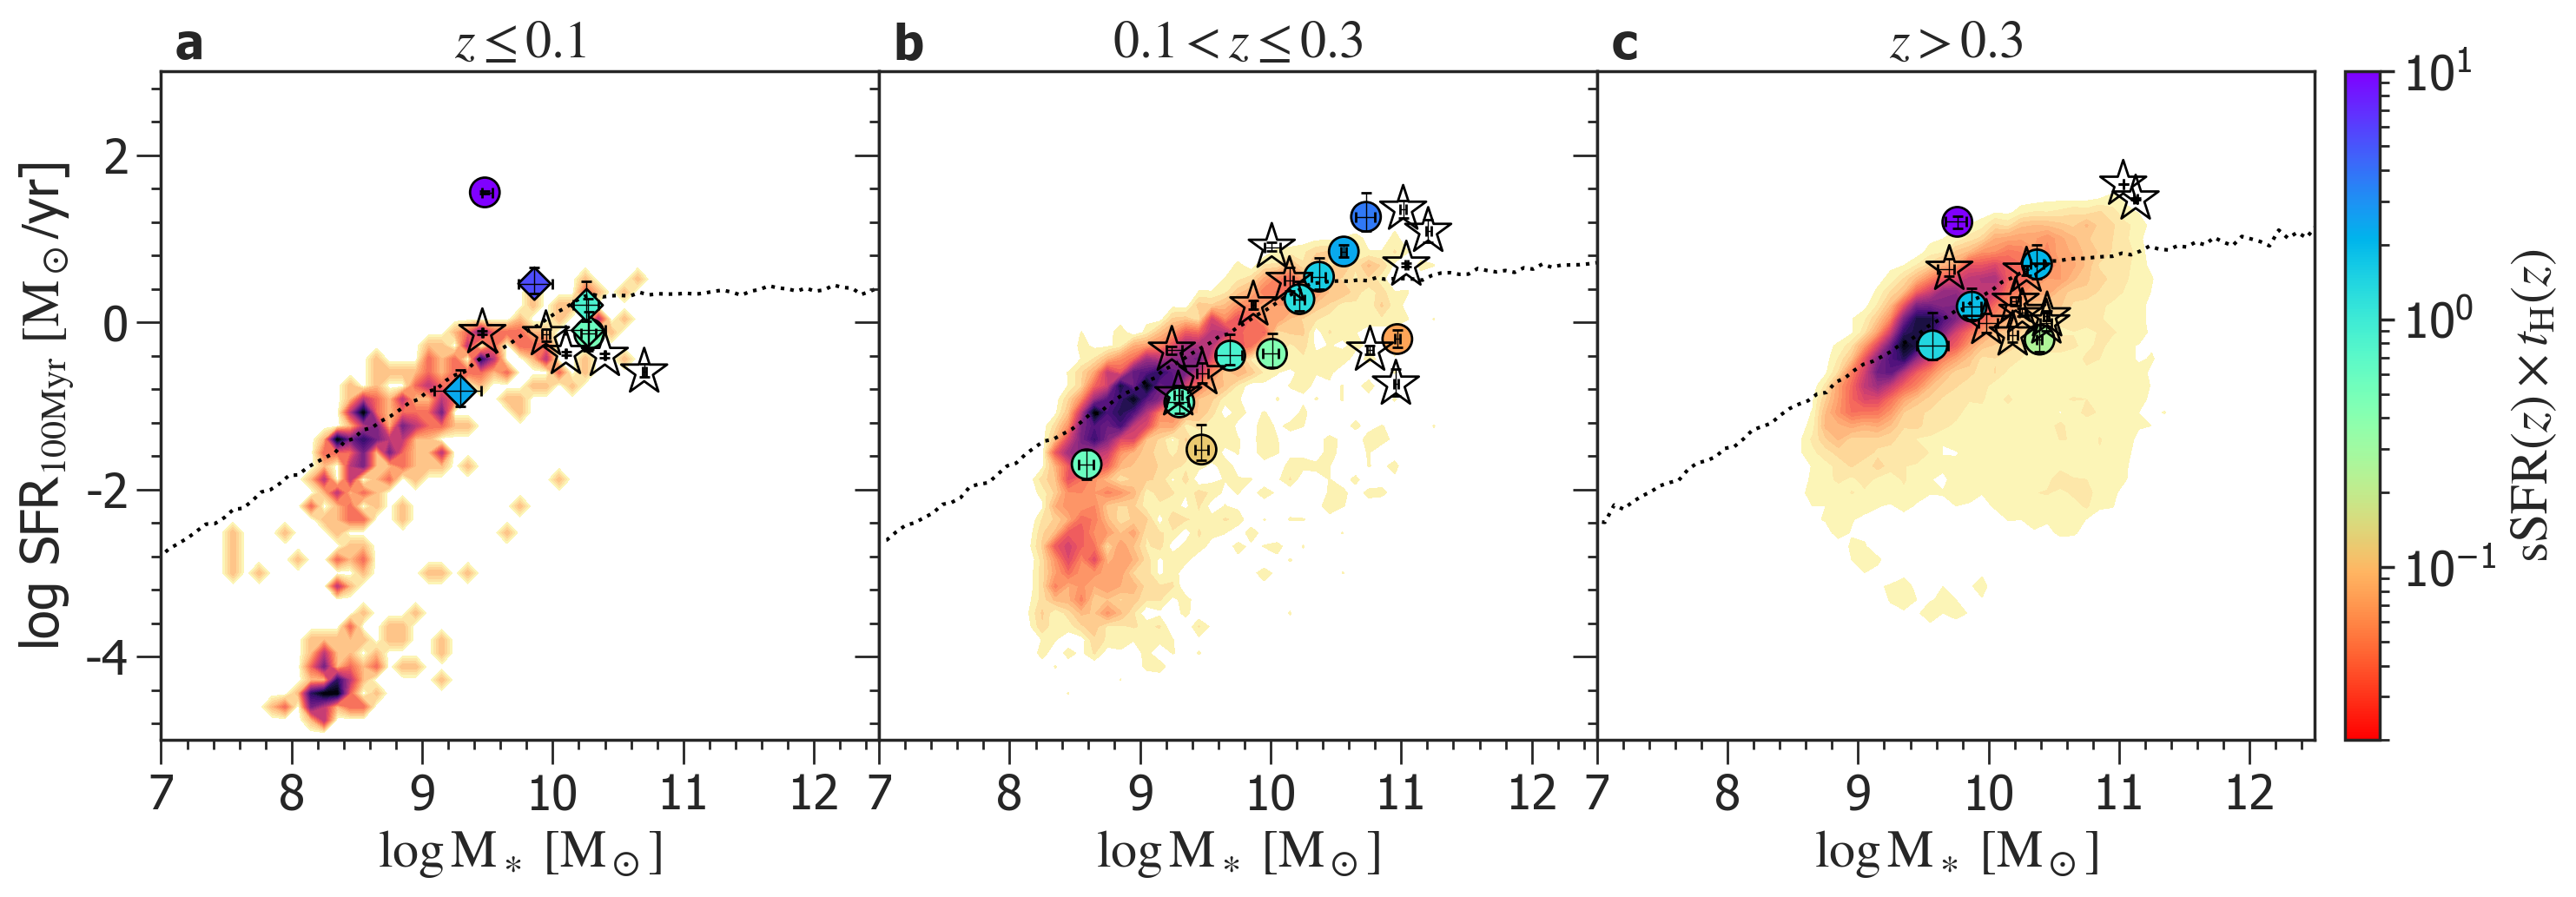

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(16, 5))
fig.subplots_adjust(wspace=0)

# z<0.1 bin
dsa_frbs = read_dsa_data()
dsa_frbs = dsa_frbs[dsa_frbs["redshift"]<=0.1]
askap_frbs = read_askap_nr_frbs()
askap_frbs = askap_frbs[askap_frbs["z"]<=0.1]
cosmos_data = read_cosmos_3dhst_data()
cosmos_data = cosmos_data[cosmos_data["z"]<=0.1]

# background galaxy distribution from COSMOS
xbins = 50
ybins = 50
counts, xedges, yedges = np.histogram2d(list(cosmos_data["Mass"]), 
                                        list(cosmos_data["SFR"]), 
                                        bins=(xbins, ybins),
                                        range=[[7, 12], [-5, 3]])

xs = []
ys = []
for i in range(len(xedges)-1):
    xs.append((xedges[i]+xedges[i+1])/2)
    ys.append((yedges[i]+yedges[i+1])/2)

mplt = ax1.contourf(xs, ys, counts.transpose(), 30, cmap=cmap)

im1 = ax1.errorbar(askap_frbs["logMstar"], 
                   np.log10(askap_frbs["sfr_100Myr"]), 
                   xerr = [np.abs(askap_frbs["logMstar_errl"]), askap_frbs["logMstar_erru"]],
                   yerr = [np.log10(askap_frbs["sfr_100Myr"]+(np.abs(askap_frbs["sfr_100Myr_errl"])))-np.log10(askap_frbs["sfr_100Myr"]),
                           np.log10(askap_frbs["sfr_100Myr"]+(np.abs(askap_frbs["sfr_100Myr_erru"])))-np.log10(askap_frbs["sfr_100Myr"])],
                   ecolor="black", fmt="o", capsize=2, elinewidth=0.5,
                   markerfacecolor="none", markeredgecolor="none")
im1 = ax1.scatter(askap_frbs["logMstar"], 
                  np.log10(askap_frbs["sfr_100Myr"]), 
                  c=(10**askap_frbs["ssfr"])*cosmo.age(askap_frbs["z"]), 
                  norm=matplotlib.colors.LogNorm(),
                  cmap="rainbow_r", marker="o", s=150, edgecolors='black')
im1.set_clim(2e-2, 10)

im1 = ax1.errorbar(chime_frbs["logMstar"], 
                   np.log10(chime_frbs["sfr_100Myr"]), 
                   xerr = [np.abs(chime_frbs["logMstar_errl"]), chime_frbs["logMstar_erru"]],
                   yerr = [np.log10(chime_frbs["sfr_100Myr"]+(np.abs(chime_frbs["sfr_100Myr_errl"])))-np.log10(chime_frbs["sfr_100Myr"]),
                           np.log10(chime_frbs["sfr_100Myr"]+(np.abs(chime_frbs["sfr_100Myr_erru"])))-np.log10(chime_frbs["sfr_100Myr"])],
                   ecolor="black", fmt="o", capsize=2, elinewidth=0.5,
                   markerfacecolor="none", markeredgecolor="none")
im2 = ax1.scatter(chime_frbs["logMstar"],
                 np.log10(chime_frbs["sfr_100Myr"]), 
                 c =(10**chime_frbs["ssfr"])*cosmo.age(chime_frbs["z"]),
                 norm=matplotlib.colors.LogNorm(), cmap = "rainbow_r",
                 marker="D", s=90, edgecolors='black')
im2.set_clim(2e-2, 10)

im1 = ax1.errorbar(dsa_frbs["logMstar"], 
                   np.log10(dsa_frbs["sfr_100Myr"]), 
                   xerr = [np.abs(dsa_frbs["logMstar_errl"]), dsa_frbs["logMstar_erru"]],
                   yerr = [np.log10(dsa_frbs["sfr_100Myr"]+(np.abs(dsa_frbs["sfr_100Myr_errl"])))-np.log10(dsa_frbs["sfr_100Myr"]),
                           np.log10(dsa_frbs["sfr_100Myr"]+(np.abs(dsa_frbs["sfr_100Myr_erru"])))-np.log10(dsa_frbs["sfr_100Myr"])],
                   ecolor="black", fmt="o", capsize=2, elinewidth=0.5,
                   markerfacecolor="none", markeredgecolor="none")
im1 = ax1.scatter(dsa_frbs["logMstar"], 
                  np.log10(dsa_frbs["sfr_100Myr"]), 
                  c=dsa_frbs["ssfr"]*cosmo.age(dsa_frbs["redshift"]), 
                  norm=matplotlib.colors.LogNorm(),
                  cmap="rainbow_r", marker="*", s=400, edgecolors='black')
im1.set_clim(2e-2, 10)

ax1.scatter(dsa_frbs[dsa_frbs["sample"]=="Silver"]["logMstar"], 
                 dsa_frbs[dsa_frbs["sample"]=="Silver"]["logzsol"],
                 color="None", marker="o", s=450, edgecolors='cyan', lw=2)


ax1.set_yticks(np.arange(-5, 3, 1))                                                                                                                                                                                                                              
ax1.set_xticks(np.arange(7, 12, 1))                                                                                                                                                                                                                                  
ax1.xaxis.set_major_locator(MultipleLocator(1)) 
ax1.xaxis.set_minor_locator(MultipleLocator(0.2))                                                                                                                                                                                                                         
ax1.yaxis.set_major_locator(MultipleLocator(2))                                                                                                                                                                                                                     
ax1.yaxis.set_minor_locator(MultipleLocator(0.4)) 
ax1.tick_params(direction='out', length=6, width=1, top=False, right=False)
ax1.tick_params(which='both', width=1)
ax1.tick_params(which='major', length=10)
ax1.tick_params(which='minor', length=4)

ax1.set_xlabel(r"$\log{{\mathrm{M}}_\ast}~[{\mathrm{M}}_\odot]$")
ax1.set_ylabel(r"log SFR$_{\rm{100 Myr}}~[{\mathrm{M}}_\odot/$yr]")


# z \in [0.1, 0.3] bin
dsa_frbs = read_dsa_data()
dsa_frbs = dsa_frbs[np.logical_and(dsa_frbs["redshift"]<=0.3, dsa_frbs["redshift"]>0.1)]
askap_frbs = read_askap_nr_frbs()
askap_frbs = askap_frbs[np.logical_and(askap_frbs["z"]<=0.3, askap_frbs["z"]>0.1)]
cosmos_data = read_cosmos_3dhst_data()
cosmos_data = cosmos_data[np.logical_and(cosmos_data["z"]<=0.3, cosmos_data["z"]>0.1)]

# background galaxy distribution from COSMOS
xbins = 50
ybins = 50
counts, xedges, yedges = np.histogram2d(list(cosmos_data["Mass"]), 
                                        list(cosmos_data["SFR"]), 
                                        bins=(xbins, ybins),
                                        range=[[7, 12], [-5, 3]])
counts /= len(list(cosmos_data["Mass"]))

xs = []
ys = []
for i in range(len(xedges)-1):
    xs.append((xedges[i]+xedges[i+1])/2)
    ys.append((yedges[i]+yedges[i+1])/2)

mplt = ax2.contourf(xs, ys, counts.transpose(), 30, cmap=cmap)

im2 = ax2.errorbar(askap_frbs["logMstar"], 
                   np.log10(askap_frbs["sfr_100Myr"]), 
                   xerr = [np.abs(askap_frbs["logMstar_errl"]), askap_frbs["logMstar_erru"]],
                   yerr = [np.log10(askap_frbs["sfr_100Myr"]+(np.abs(askap_frbs["sfr_100Myr_errl"])))-np.log10(askap_frbs["sfr_100Myr"]),
                           np.log10(askap_frbs["sfr_100Myr"]+(np.abs(askap_frbs["sfr_100Myr_erru"])))-np.log10(askap_frbs["sfr_100Myr"])],
                   ecolor="black", fmt="o", capsize=2, elinewidth=0.5,
                   markerfacecolor="none", markeredgecolor="none")
im2 = ax2.scatter(askap_frbs["logMstar"], 
                  np.log10(askap_frbs["sfr_100Myr"]), 
                  c=(10**askap_frbs["ssfr"])*cosmo.age(askap_frbs["z"]), 
                  norm=matplotlib.colors.LogNorm(),
                  cmap="rainbow_r", marker="o", s=150, edgecolors='black')
im2.set_clim(2e-2, 10)

im2 = ax2.errorbar(dsa_frbs["logMstar"], 
                   np.log10(dsa_frbs["sfr_100Myr"]), 
                   xerr = [np.abs(dsa_frbs["logMstar_errl"]), dsa_frbs["logMstar_erru"]],
                   yerr = [np.log10(dsa_frbs["sfr_100Myr"]+(np.abs(dsa_frbs["sfr_100Myr_errl"])))-np.log10(dsa_frbs["sfr_100Myr"]),
                           np.log10(dsa_frbs["sfr_100Myr"]+(np.abs(dsa_frbs["sfr_100Myr_erru"])))-np.log10(dsa_frbs["sfr_100Myr"])],
                   ecolor="black", fmt="o", capsize=2, elinewidth=0.5,
                   markerfacecolor="none", markeredgecolor="none")
im2 = ax2.scatter(dsa_frbs["logMstar"], 
                  np.log10(dsa_frbs["sfr_100Myr"]), 
                  c=dsa_frbs["ssfr"]*cosmo.age(dsa_frbs["redshift"]), 
                  norm=matplotlib.colors.LogNorm(),
                  cmap="rainbow_r", marker="*", s=400, edgecolors='black')
im2.set_clim(2e-2, 10)

ax2.scatter(dsa_frbs[dsa_frbs["sample"]=="Silver"]["logMstar"], 
                 dsa_frbs[dsa_frbs["sample"]=="Silver"]["logzsol"],
                 color="None", marker="o", s=450, edgecolors='cyan', lw=2)


ax2.set_yticks(np.arange(-5, 3, 1))                                                                                                                                                                                                                              
ax2.set_xticks(np.arange(7, 12, 1))                                                                                                                                                                                                                                  
ax2.xaxis.set_major_locator(MultipleLocator(1)) 
ax2.xaxis.set_minor_locator(MultipleLocator(0.2))                                                                                                                                                                                                                         
ax2.yaxis.set_major_locator(MultipleLocator(2))                                                                                                                                                                                                                     
ax2.yaxis.set_minor_locator(MultipleLocator(0.4)) 
ax2.tick_params(direction='out', length=6, width=1, top=False, right=False)
ax2.tick_params(which='both', width=1)
ax2.tick_params(which='major', length=10)
ax2.tick_params(which='minor', length=4)

ax2.set_xlabel(r"$\log{{\mathrm{M}}_\ast}~[{\mathrm{M}}_\odot]$")


# z > 0.3
dsa_frbs = read_dsa_data()
dsa_frbs = dsa_frbs[dsa_frbs["redshift"]>0.3]
askap_frbs = read_askap_nr_frbs()
askap_frbs = askap_frbs[askap_frbs["z"]>0.3]
cosmos_data = read_cosmos_3dhst_data()
cosmos_data = cosmos_data[cosmos_data["z"]>0.3]

# background galaxy distribution from COSMOS
xbins = 50
ybins = 50
counts, xedges, yedges = np.histogram2d(list(cosmos_data["Mass"]), 
                                        list(cosmos_data["SFR"]), 
                                        bins=(xbins, ybins),
                                        range=[[7, 12], [-5, 3]])
counts /= len(list(cosmos_data["Mass"]))

xs = []
ys = []
for i in range(len(xedges)-1):
    xs.append((xedges[i]+xedges[i+1])/2)
    ys.append((yedges[i]+yedges[i+1])/2)

mplt = ax3.contourf(xs, ys, counts.transpose(), 30, cmap=cmap)

im3 = ax3.errorbar(askap_frbs["logMstar"], 
                   np.log10(askap_frbs["sfr_100Myr"]), 
                   xerr = [np.abs(askap_frbs["logMstar_errl"]), askap_frbs["logMstar_erru"]],
                   yerr = [np.log10(askap_frbs["sfr_100Myr"]+(np.abs(askap_frbs["sfr_100Myr_errl"])))-np.log10(askap_frbs["sfr_100Myr"]),
                           np.log10(askap_frbs["sfr_100Myr"]+(np.abs(askap_frbs["sfr_100Myr_erru"])))-np.log10(askap_frbs["sfr_100Myr"])],
                   ecolor="black", fmt="o", capsize=2, elinewidth=0.5,
                   markerfacecolor="none", markeredgecolor="none")
im3 = ax3.scatter(askap_frbs["logMstar"], 
                  np.log10(askap_frbs["sfr_100Myr"]), 
                  c=(10**askap_frbs["ssfr"])*cosmo.age(askap_frbs["z"]), 
                  norm=matplotlib.colors.LogNorm(),
                  cmap="rainbow_r", marker="o", s=150, edgecolors='black')
im3.set_clim(2e-2, 10)

im3 = ax3.errorbar(dsa_frbs["logMstar"], 
                   np.log10(dsa_frbs["sfr_100Myr"]), 
                   xerr = [np.abs(dsa_frbs["logMstar_errl"]), dsa_frbs["logMstar_erru"]],
                   yerr = [np.log10(dsa_frbs["sfr_100Myr"]+(np.abs(dsa_frbs["sfr_100Myr_errl"])))-np.log10(dsa_frbs["sfr_100Myr"]),
                           np.log10(dsa_frbs["sfr_100Myr"]+(np.abs(dsa_frbs["sfr_100Myr_erru"])))-np.log10(dsa_frbs["sfr_100Myr"])],
                   ecolor="black", fmt="o", capsize=2, elinewidth=0.5,
                   markerfacecolor="none", markeredgecolor="none")
im3 = ax3.scatter(dsa_frbs["logMstar"], 
                  np.log10(dsa_frbs["sfr_100Myr"]), 
                  c=dsa_frbs["ssfr"]*cosmo.age(dsa_frbs["redshift"]), 
                  norm=matplotlib.colors.LogNorm(),
                  cmap="rainbow_r", marker="*", s=400, edgecolors='black')
im3.set_clim(2e-2, 10)
ax3.scatter(dsa_frbs[dsa_frbs["sample"]=="Silver"]["logMstar"], 
            np.log10(dsa_frbs[dsa_frbs["sample"]=="Silver"]["sfr_100Myr"]),
            color="None", marker="o", s=450, edgecolors='cyan', lw=2)


box = ax3.get_position()
ax3.set_position([box.x0*1.0, box.y0, box.width, box.height])
axColor = plt.axes([box.x0*1.0005 + box.width * 1.04, box.y0, 0.0125, box.height])
cb = plt.colorbar(im3, cax = axColor, orientation="vertical")
cb.set_label(r'$\mathrm{{sSFR}}(z) \times t_{\mathrm{{H}}}(z)$', labelpad = 5)


ax3.set_yticks(np.arange(-5, 3, 1))                                                                                                                                                                                                                              
ax3.set_xticks(np.arange(7, 12, 1))                                                                                                                                                                                                                                  
ax3.xaxis.set_major_locator(MultipleLocator(1)) 
ax3.xaxis.set_minor_locator(MultipleLocator(0.2))                                                                                                                                                                                                                         
ax3.yaxis.set_major_locator(MultipleLocator(2))                                                                                                                                                                                                                     
ax3.yaxis.set_minor_locator(MultipleLocator(0.4)) 
ax3.tick_params(direction='out', length=6, width=1, top=False, right=False)
ax3.tick_params(which='both', width=1)
ax3.tick_params(which='major', length=10)
ax3.tick_params(which='minor', length=4)

ax3.set_xlabel(r"$\log{{\mathrm{M}}_\ast}~[{\mathrm{M}}_\odot]$")

ax1.set_title(r'$z \leq 0.1$')
ax2.set_title(r'$0.1 < z \leq 0.3$')
ax3.set_title(r'$z > 0.3$')


z0 = 0.05
logm = np.linspace(6, 13, 100)
logSFRs = []
for logMstar in logm:
    logSFRs.append(generate_ms_center(logMstar, z0))
ax1.plot(logm, logSFRs, color="black", ls="dotted")
ax1.set_ylim(-5, 3)                                                                                                                                                                                                                             
ax1.set_xlim(7, 12)

z0 = 0.2
logm = np.linspace(6, 13, 100)
logSFRs = []
for logMstar in logm:
    logSFRs.append(generate_ms_center(logMstar, z0))
ax2.plot(logm, logSFRs, color="black", ls="dotted")
ax2.set_ylim(-5, 3)                                                                                                                                                                                                                             
ax2.set_xlim(7, 12)

z0 = 0.45
logm = np.linspace(6, 13, 100)
logSFRs = []
for logMstar in logm:
    logSFRs.append(generate_ms_center(logMstar, z0))
ax3.plot(logm, logSFRs, color="black", ls="dotted")
ax3.set_ylim(-5, 3)                                                                                                                                                                                                                             

ax1.set_xlim(7, 12.5)
ax2.set_xlim(7, 12.5)
ax3.set_xlim(7, 12.5)

ax1.text(0.02, 1.04, "a", ha='left', va='center', weight='bold', 
         transform=ax1.transAxes, fontsize=20)
ax2.text(0.02, 1.04, "b", ha='left', va='center', weight='bold', 
         transform=ax2.transAxes, fontsize=20)
ax3.text(0.02, 1.04, "c", ha='left', va='center', weight='bold', 
         transform=ax3.transAxes, fontsize=20)

# plt.savefig('figures/gal_sfms.png', dpi=400, bbox_inches='tight')


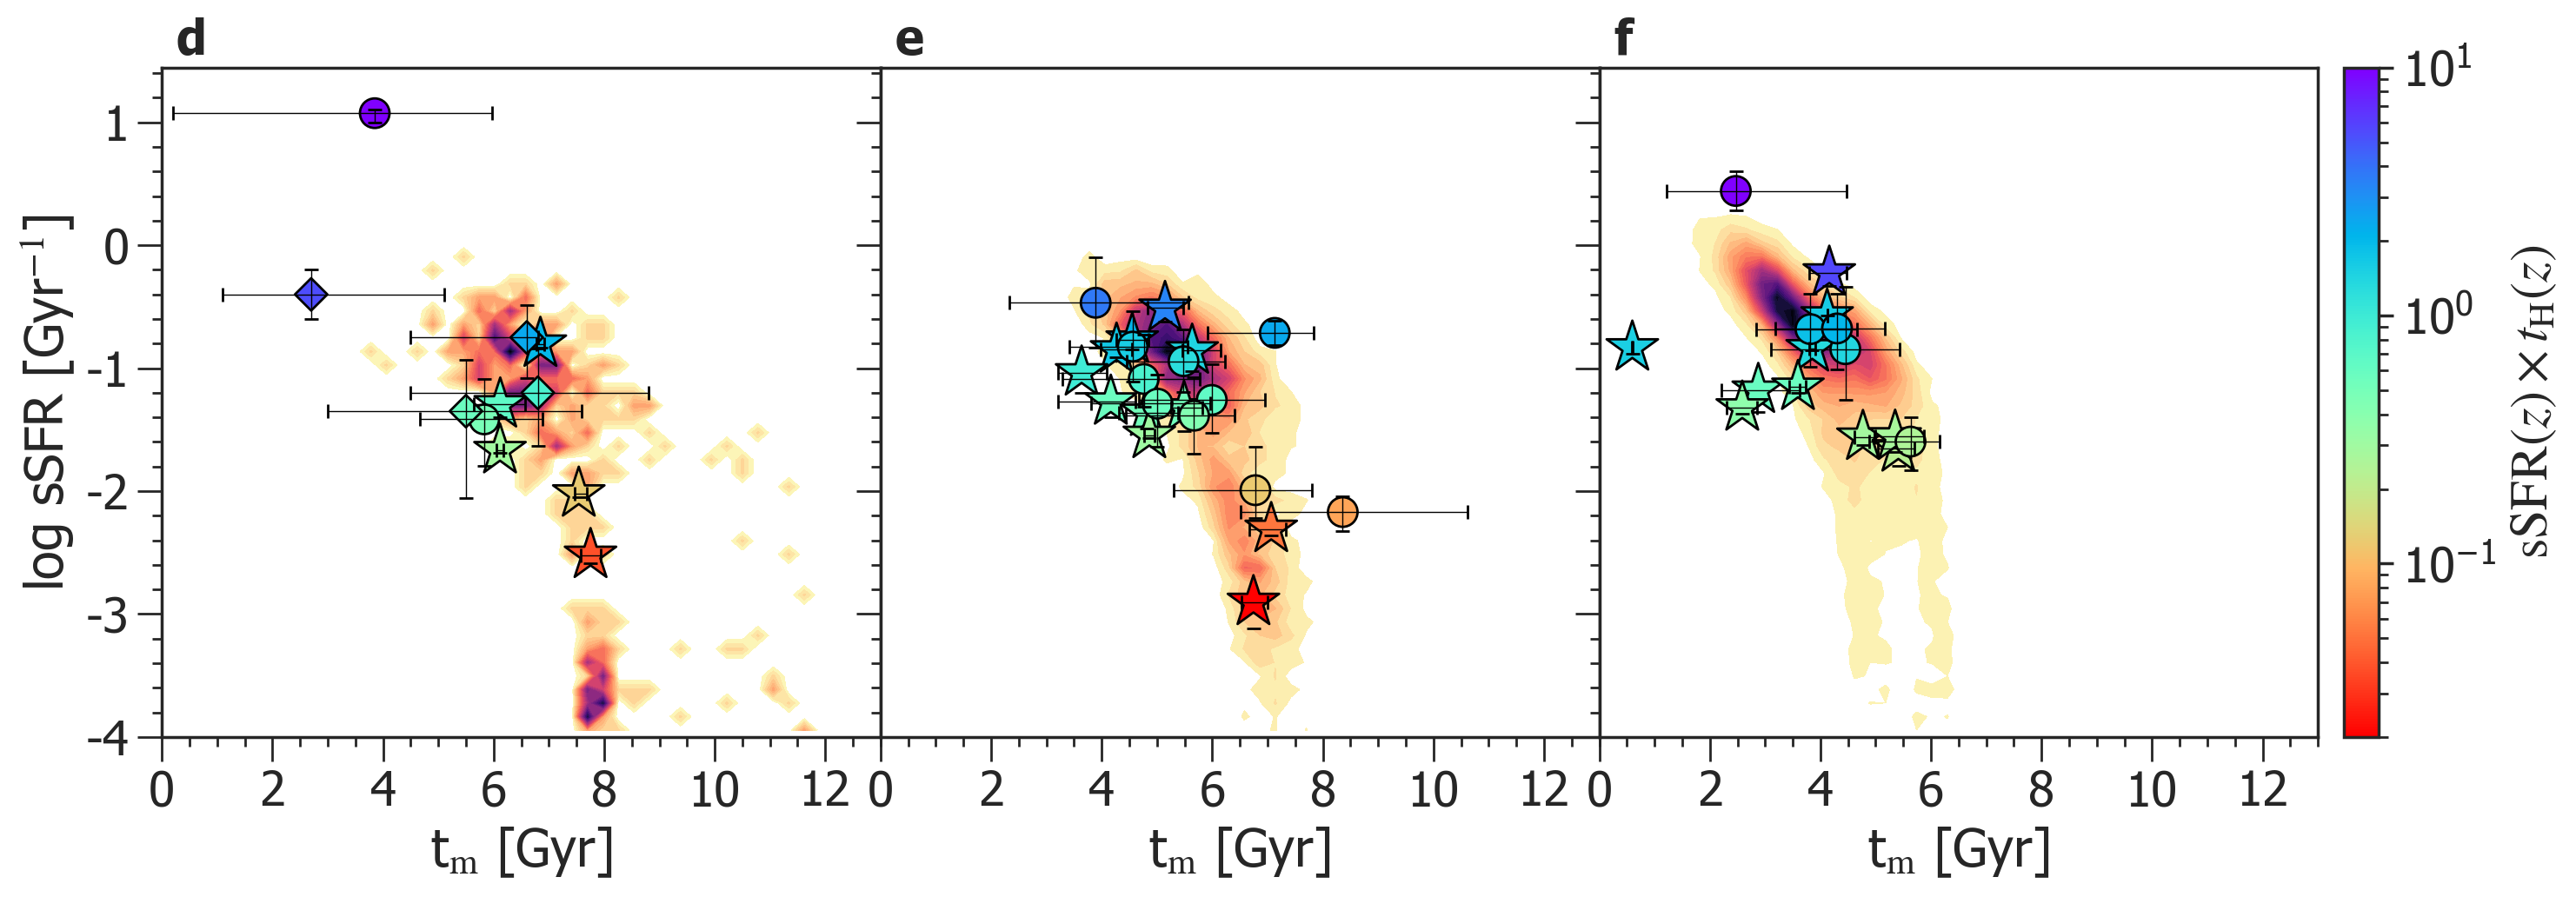

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(16, 5))

# z<0.1 bin
dsa_frbs = read_dsa_data()
dsa_frbs = dsa_frbs[dsa_frbs["redshift"]<=0.1]
askap_frbs = read_askap_nr_frbs()
askap_frbs = askap_frbs[askap_frbs["z"]<=0.1]
askap_frbs_rep = read_askap_r_frbs()
askap_frbs_rep = askap_frbs_rep[askap_frbs_rep["z"]<=0.1]
cosmos_data = read_cosmos_3dhst_data()
cosmos_data = cosmos_data[cosmos_data["z"]<=0.1]

# background galaxy distribution from COSMOS
xbins = 50
ybins = 50
counts, xedges, yedges = np.histogram2d(list(cosmos_data["avg_age_median"]), 
                                        list(np.array(cosmos_data["ssfr_100_median"])+9), 
                                        bins=(xbins, ybins),
                                        range=[[0, 14], [-4, 1.5]])
counts /= len(list(cosmos_data["Mass"]))

xs = []
ys = []
for i in range(len(xedges)-1):
    xs.append((xedges[i]+xedges[i+1])/2)
    ys.append((yedges[i]+yedges[i+1])/2)

mplt = ax1.contourf(xs, ys, counts.transpose(), 30, cmap=cmap)

im = ax1.errorbar(dsa_frbs["t_m"], 
                  dsa_frbs["ssfr"], 
                  xerr = [np.abs(dsa_frbs["t_m_errl"]), dsa_frbs["t_m_erru"]],
                  yerr = [(dsa_frbs["ssfr"]+np.abs(dsa_frbs["ssfr_errl"]))-(dsa_frbs["ssfr"]), np.log10(dsa_frbs["ssfr"]+np.abs(dsa_frbs["ssfr_erru"]))-np.log10(dsa_frbs["ssfr"])],
                  ecolor="black", fmt="o", capsize=3, elinewidth=0.5,
                  markerfacecolor="none", markeredgecolor="none")
im = ax1.scatter(dsa_frbs["t_m"],
                 dsa_frbs["ssfr"],  
                 c=10**dsa_frbs["ssfr"]*cosmo.age(dsa_frbs["redshift"]), 
                 norm=matplotlib.colors.LogNorm(),
                 cmap="rainbow_r", marker="*", s=500, edgecolors='black')
im.set_clim(2e-2, 10)
im = ax1.errorbar(askap_frbs["t_m"], 
                  askap_frbs["ssfr"], 
                  xerr = [np.abs(askap_frbs["t_m_errl"]), askap_frbs["t_m_erru"]],
                  yerr = [np.abs(askap_frbs["ssfr_errl"]), np.abs(askap_frbs["ssfr_erru"])],
                  ecolor="black", fmt="o", capsize=3, elinewidth=0.5,
                  markerfacecolor="none", markeredgecolor="none")
im = ax1.scatter(askap_frbs["t_m"],
                 askap_frbs["ssfr"],  
                 c=(10**askap_frbs["ssfr"])*cosmo.age(askap_frbs["z"]), 
                 norm=matplotlib.colors.LogNorm(),
                 cmap="rainbow_r", marker="o", s=150, edgecolors='black') 
im.set_clim(2e-2, 10)

im = ax1.errorbar(chime_frbs["t_m"], 
                  chime_frbs["ssfr"], 
                  xerr = [np.abs(chime_frbs["t_m_errl"]), chime_frbs["t_m_erru"]],
                  yerr = [np.abs(chime_frbs["ssfr_errl"]), np.abs(chime_frbs["ssfr_erru"])],
                  ecolor="black", fmt="o", capsize=3, elinewidth=0.5,
                  markerfacecolor="none", markeredgecolor="none")
im = ax1.scatter(chime_frbs["t_m"],
                 chime_frbs["ssfr"],  
                 c=(10**chime_frbs["ssfr"])*cosmo.age(chime_frbs["z"]), 
                 norm=matplotlib.colors.LogNorm(),
                 cmap="rainbow_r", marker="D", s=90, edgecolors='black') 
im.set_clim(2e-2, 10)


ax1.set_xticks(np.arange(0, 13.6, 1))                                                                                                                                                                                                                              
ax1.set_yticks(np.arange(-4, 1.5, 1)) 
ax1.xaxis.set_major_locator(MultipleLocator(2)) 
ax1.xaxis.set_minor_locator(MultipleLocator(0.5))                                                                                                                                                                                                                         
ax1.yaxis.set_major_locator(MultipleLocator(1))                                                                                                                                                                                                                     
ax1.yaxis.set_minor_locator(MultipleLocator(0.2)) 
ax1.tick_params(direction='out', length=6, width=1, top=False, right=False)
ax1.tick_params(which='both', width=1)
ax1.tick_params(which='major', length=10)
ax1.tick_params(which='minor', length=4)

ax1.set_xlabel(r"t$_{\rm{m}}$ [Gyr]")
ax1.set_ylabel(r"log sSFR [Gyr$^{-1}$]")


# z \in [0.1, 0.3] bin
dsa_frbs = read_dsa_data()
dsa_frbs = dsa_frbs[np.logical_and(dsa_frbs["redshift"]<=0.3, dsa_frbs["redshift"]>0.1)]
askap_frbs = read_askap_nr_frbs()
askap_frbs = askap_frbs[np.logical_and(askap_frbs["z"]<=0.3, askap_frbs["z"]>0.1)]
askap_frbs_rep = read_askap_r_frbs()
askap_frbs_rep = askap_frbs_rep[np.logical_and(askap_frbs_rep["z"]<=0.3, askap_frbs_rep["z"]>0.1)]
cosmos_data = read_cosmos_3dhst_data()
cosmos_data = cosmos_data[np.logical_and(cosmos_data["z"]<=0.3, cosmos_data["z"]>0.1)]

# background galaxy distribution from COSMOS
xbins = 50
ybins = 50
counts, xedges, yedges = np.histogram2d(list(cosmos_data["avg_age_median"]), 
                                        list(np.array(cosmos_data["ssfr_100_median"])+9), 
                                        bins=(xbins, ybins),
                                        range=[[0, 14], [-4, 1.5]])
counts /= len(list(cosmos_data["Mass"]))

xs = []
ys = []
for i in range(len(xedges)-1):
    xs.append((xedges[i]+xedges[i+1])/2)
    ys.append((yedges[i]+yedges[i+1])/2)

mplt = ax2.contourf(xs, ys, counts.transpose(), 30, cmap=cmap)

im = ax2.errorbar(dsa_frbs["t_m"], 
                  dsa_frbs["ssfr"], 
                  xerr = [np.abs(dsa_frbs["t_m_errl"]), dsa_frbs["t_m_erru"]],
                  yerr = [(dsa_frbs["ssfr"]+np.abs(dsa_frbs["ssfr_errl"]))-(dsa_frbs["ssfr"]), np.log10(dsa_frbs["ssfr"]+np.abs(dsa_frbs["ssfr_erru"]))-np.log10(dsa_frbs["ssfr"])],
                  ecolor="black", fmt="o", capsize=3, elinewidth=0.5,
                  markerfacecolor="none", markeredgecolor="none")
im = ax2.scatter(dsa_frbs["t_m"],
                 dsa_frbs["ssfr"],  
                 c=10**dsa_frbs["ssfr"]*cosmo.age(dsa_frbs["redshift"]), 
                 norm=matplotlib.colors.LogNorm(),
                 cmap="rainbow_r", marker="*", s=500, edgecolors='black')
im.set_clim(2e-2, 10)
im = ax2.errorbar(askap_frbs["t_m"], 
                  askap_frbs["ssfr"], 
                  xerr = [np.abs(askap_frbs["t_m_errl"]), askap_frbs["t_m_erru"]],
                  yerr = [np.abs(askap_frbs["ssfr_errl"]), np.abs(askap_frbs["ssfr_erru"])],
                  ecolor="black", fmt="o", capsize=3, elinewidth=0.5,
                  markerfacecolor="none", markeredgecolor="none")
im = ax2.scatter(askap_frbs["t_m"],
                 askap_frbs["ssfr"],  
                 c=(10**askap_frbs["ssfr"])*cosmo.age(askap_frbs["z"]), 
                 norm=matplotlib.colors.LogNorm(),
                 cmap="rainbow_r", marker="o", s=150, edgecolors='black') 
im.set_clim(2e-2, 10)

ax2.set_xticks(np.arange(0, 14, 1))                                                                                                                                                                                                                              
ax2.set_yticks(np.arange(-4, 1.5, 1)) 
ax2.xaxis.set_major_locator(MultipleLocator(2)) 
ax2.xaxis.set_minor_locator(MultipleLocator(0.5))                                                                                                                                                                                                                         
ax2.yaxis.set_major_locator(MultipleLocator(1))                                                                                                                                                                                                                     
ax2.yaxis.set_minor_locator(MultipleLocator(0.2)) 
ax2.tick_params(direction='out', length=6, width=1, top=False, right=False)
ax2.tick_params(which='both', width=1)
ax2.tick_params(which='major', length=10)
ax2.tick_params(which='minor', length=4)

ax2.set_xlabel(r"t$_{\rm{m}}$ [Gyr]")


# z > 0.3 bin
dsa_frbs = read_dsa_data()
dsa_frbs = dsa_frbs[dsa_frbs["redshift"]>0.3]
askap_frbs = read_askap_nr_frbs()
askap_frbs = askap_frbs[askap_frbs["z"]>0.3]
askap_frbs_rep = read_askap_r_frbs()
askap_frbs_rep = askap_frbs_rep[askap_frbs_rep["z"]>0.3]
cosmos_data = read_cosmos_3dhst_data()
cosmos_data = cosmos_data[cosmos_data["z"]>0.3]

# background galaxy distribution from COSMOS
xbins = 50
ybins = 50
counts, xedges, yedges = np.histogram2d(list(cosmos_data["avg_age_median"]), 
                                        list(np.array(cosmos_data["ssfr_100_median"])+9), 
                                        bins=(xbins, ybins),
                                        range=[[0, 14], [-4, 1.5]])
counts /= len(list(cosmos_data["Mass"]))

xs = []
ys = []
for i in range(len(xedges)-1):
    xs.append((xedges[i]+xedges[i+1])/2)
    ys.append((yedges[i]+yedges[i+1])/2)

mplt = ax3.contourf(xs, ys, counts.transpose(), 30, cmap=cmap)

im = ax3.errorbar(dsa_frbs["t_m"], 
                  dsa_frbs["ssfr"], 
                  xerr = [np.abs(dsa_frbs["t_m_errl"]), dsa_frbs["t_m_erru"]],
                  yerr = [(dsa_frbs["ssfr"]+np.abs(dsa_frbs["ssfr_errl"]))-(dsa_frbs["ssfr"]), np.log10(dsa_frbs["ssfr"]+np.abs(dsa_frbs["ssfr_erru"]))-np.log10(dsa_frbs["ssfr"])],
                  ecolor="black", fmt="o", capsize=3, elinewidth=0.5,
                  markerfacecolor="none", markeredgecolor="none")
im = ax3.scatter(dsa_frbs["t_m"],
                 dsa_frbs["ssfr"],  
                 c=10**dsa_frbs["ssfr"]*cosmo.age(dsa_frbs["redshift"]), 
                 norm=matplotlib.colors.LogNorm(),
                 cmap="rainbow_r", marker="*", s=500, edgecolors='black')
im.set_clim(2e-2, 10)
im = ax3.errorbar(askap_frbs["t_m"], 
                  askap_frbs["ssfr"], 
                  xerr = [np.abs(askap_frbs["t_m_errl"]), askap_frbs["t_m_erru"]],
                  yerr = [np.abs(askap_frbs["ssfr_errl"]), np.abs(askap_frbs["ssfr_erru"])],
                  ecolor="black", fmt="o", capsize=3, elinewidth=0.5,
                  markerfacecolor="none", markeredgecolor="none")
im = ax3.scatter(askap_frbs["t_m"],
                 askap_frbs["ssfr"],  
                 c=(10**askap_frbs["ssfr"])*cosmo.age(askap_frbs["z"]), 
                 norm=matplotlib.colors.LogNorm(),
                 cmap="rainbow_r", marker="o", s=150, edgecolors='black') 
im.set_clim(2e-2, 10)

ax3.scatter(dsa_frbs[dsa_frbs["sample"]=="Silver"]["t_m"], 
            np.log10(dsa_frbs[dsa_frbs["sample"]=="Silver"]["ssfr"]), 
            color="None", marker="o", s=450, edgecolors='cyan', lw=2)

box = ax3.get_position()
ax3.set_position([box.x0*1.0, box.y0, box.width, box.height])
axColor = plt.axes([box.x0*1.0005 + box.width * 1.04, box.y0, 0.0125, box.height])
cb = plt.colorbar(im, cax = axColor, orientation="vertical")
cb.set_label(r'$\mathrm{{sSFR}}(z) \times t_{\mathrm{{H}}}(z)$', labelpad = 5)

ax3.set_xticks(np.arange(0, 14, 1))                                                                                                                                                                                                                              
ax3.set_yticks(np.arange(-4, 1.5, 1)) 
ax3.xaxis.set_major_locator(MultipleLocator(2)) 
ax3.xaxis.set_minor_locator(MultipleLocator(0.5))                                                                                                                                                                                                                         
ax3.yaxis.set_major_locator(MultipleLocator(1))                                                                                                                                                                                                                     
ax3.yaxis.set_minor_locator(MultipleLocator(0.2)) 
ax3.tick_params(direction='out', length=6, width=1, top=False, right=False)
ax3.tick_params(which='both', width=1)
ax3.tick_params(which='major', length=10)
ax3.tick_params(which='minor', length=4)

ax3.set_xlabel(r"t$_{\rm{m}}$ [Gyr]")

ax1.set_xlim(0, 13)
ax2.set_xlim(0, 13)
ax3.set_xlim(0, 13)

ax1.text(0.02, 1.04, "d", ha='left', va='center', weight='bold', 
         transform=ax1.transAxes, fontsize=20)
ax2.text(0.02, 1.04, "e", ha='left', va='center', weight='bold', 
         transform=ax2.transAxes, fontsize=20)
ax3.text(0.02, 1.04, "f", ha='left', va='center', weight='bold', 
         transform=ax3.transAxes, fontsize=20)

plt.subplots_adjust(wspace=0)
# plt.savefig('figures/tm_ssfr.png', dpi=400, bbox_inches='tight')
